In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tools import eval_measures
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

In [2]:
rawfeats = pd.read_csv('data/dengue_features_train.csv')
rawlabels = pd.read_csv('data/dengue_labels_train.csv')
rawfeats['total_cases'] = rawlabels['total_cases']
sj = rawfeats[rawfeats.city=='sj'].copy()
print(sj.shape)
sj.head()

(936, 25)


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


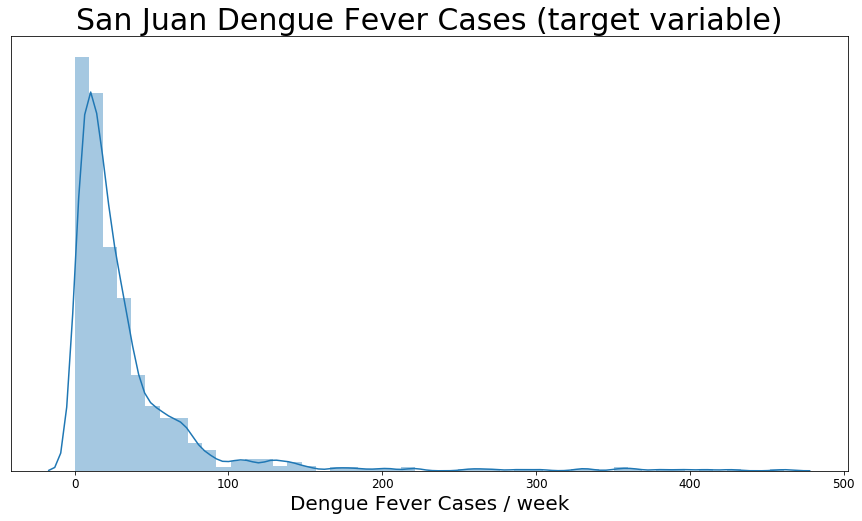

In [6]:
#outcome variable
plt.figure(figsize=[15,8])
sns.distplot(sj.total_cases, bins=50)
plt.yticks([])
plt.xticks(size=12)
plt.title('San Juan Dengue Fever Cases (target variable)', size=30)
plt.xlabel('Dengue Fever Cases / week', size=20)
plt.show()

c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


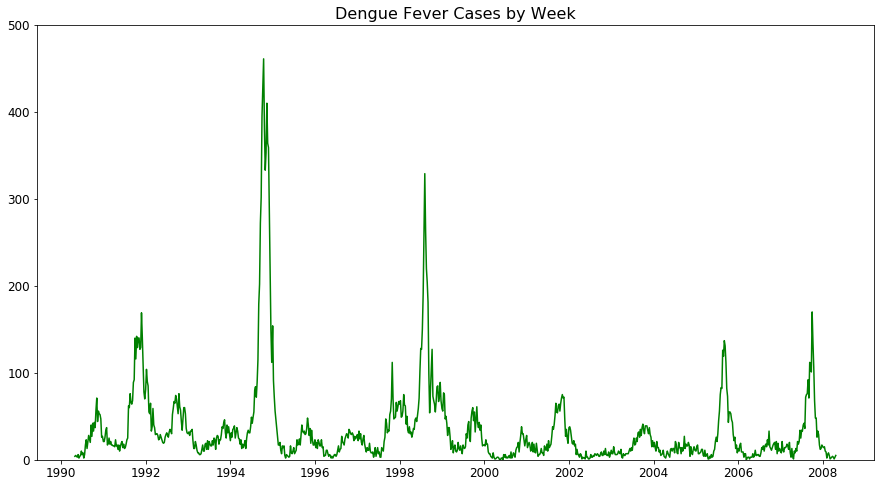

In [5]:
plt.figure(figsize=[15,8])
plt.title('Dengue Fever Cases by Week', size=16)
plt.plot(pd.to_datetime(sj.week_start_date), sj.total_cases, color='green')
#plt.xlim(['1990-01-01','2013-12-31' ])
plt.ylim([0,500])
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

In [6]:
pd.to_datetime(sj.week_start_date)

0     1990-04-30
1     1990-05-07
2     1990-05-14
3     1990-05-21
4     1990-05-28
5     1990-06-04
6     1990-06-11
7     1990-06-18
8     1990-06-25
9     1990-07-02
10    1990-07-09
11    1990-07-16
12    1990-07-23
13    1990-07-30
14    1990-08-06
15    1990-08-13
16    1990-08-20
17    1990-08-27
18    1990-09-03
19    1990-09-10
20    1990-09-17
21    1990-09-24
22    1990-10-01
23    1990-10-08
24    1990-10-15
25    1990-10-22
26    1990-10-29
27    1990-11-05
28    1990-11-12
29    1990-11-19
         ...    
906   2007-10-01
907   2007-10-08
908   2007-10-15
909   2007-10-22
910   2007-10-29
911   2007-11-05
912   2007-11-12
913   2007-11-19
914   2007-11-26
915   2007-12-03
916   2007-12-10
917   2007-12-17
918   2007-12-24
919   2008-01-01
920   2008-01-08
921   2008-01-15
922   2008-01-22
923   2008-01-29
924   2008-02-05
925   2008-02-12
926   2008-02-19
927   2008-02-26
928   2008-03-04
929   2008-03-11
930   2008-03-18
931   2008-03-25
932   2008-04-01
933   2008-04-

## Date Fix

In [7]:
for year in sj.year.unique():
    print(f'{year} max: {max(sj[sj.year==year]["weekofyear"])}\
  | min: {min(sj[sj.year==year]["weekofyear"])} | uniques: {sj[sj.year==year]["weekofyear"].nunique()}')

1990 max: 52  | min: 18 | uniques: 35
1991 max: 52  | min: 1 | uniques: 52
1992 max: 52  | min: 1 | uniques: 52
1993 max: 53  | min: 1 | uniques: 52
1994 max: 52  | min: 1 | uniques: 52
1995 max: 52  | min: 1 | uniques: 52
1996 max: 52  | min: 1 | uniques: 52
1997 max: 52  | min: 1 | uniques: 52
1998 max: 52  | min: 1 | uniques: 52
1999 max: 53  | min: 1 | uniques: 52
2000 max: 52  | min: 1 | uniques: 52
2001 max: 52  | min: 1 | uniques: 52
2002 max: 52  | min: 1 | uniques: 52
2003 max: 52  | min: 1 | uniques: 52
2004 max: 52  | min: 1 | uniques: 52
2005 max: 53  | min: 1 | uniques: 52
2006 max: 52  | min: 1 | uniques: 52
2007 max: 52  | min: 1 | uniques: 52
2008 max: 17  | min: 1 | uniques: 17


In [8]:
for year in sj.year.unique():
    print(year,sj[sj.year==year]['weekofyear'].unique(),'\n')

1990 [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52] 

1991 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52] 

1992 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52] 

1993 [53  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51] 

1994 [52  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51] 

1995 [52  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51] 

1996 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15

In [9]:
#Some years have issues here. let's look closer:
#here we find that the first week of the year is registering as 53 
#instead of 1. We'll need to increment each week value in those
#years by one
for year in [1993,1999,2005]:
    display(sj[sj.year==year-1].tail(3))
    display(sj[sj.year==year].head(3))

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
136,sj,1992,50,1992-12-09,0.05470,0.109900,0.198157,0.215967,86.28,298.734286,...,78.311429,86.28,16.024286,2.114286,26.914286,7.185714,31.1,22.2,9.4,53
137,sj,1992,51,1992-12-16,NaN,0.066425,0.192343,0.194129,0.00,298.285714,...,76.661429,0.00,15.251429,2.642857,26.685714,8.385714,32.2,21.7,47.5,36
138,sj,1992,52,1992-12-23,-0.01008,0.068217,0.086900,0.073313,0.00,297.172857,...,76.757143,0.00,14.324286,1.928571,25.914286,6.485714,29.4,21.7,5.5,31


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
139,sj,1993,53,1993-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30
140,sj,1993,1,1993-01-08,0.028350,0.043667,0.078657,0.046457,46.79,297.467143,...,81.878571,46.79,15.520000,1.900000,25.871429,6.500000,30.6,21.7,28.0,32
141,sj,1993,2,1993-01-15,0.030067,0.037850,0.131886,0.109200,0.00,297.331429,...,77.144286,0.00,14.467143,1.714286,24.500000,7.042857,28.3,20.6,23.5,28


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
448,sj,1998,50,1998-12-10,0.061900,0.002633,0.21330,0.173014,152.94,298.094286,...,85.911429,152.94,16.965714,1.357143,25.814286,5.014286,28.9,22.8,97.6,73
449,sj,1998,51,1998-12-17,-0.082167,-0.091675,0.23990,0.170057,16.76,299.042857,...,78.668571,16.76,16.408571,1.971429,26.071429,5.542857,31.1,22.8,18.9,89
450,sj,1998,52,1998-12-24,0.060567,-0.130950,0.15715,0.098187,0.00,299.282857,...,78.418571,0.00,16.564286,2.128571,25.928571,6.042857,30.0,22.2,29.7,68


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
451,sj,1999,53,1999-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59
452,sj,1999,1,1999-01-08,NaN,-0.087600,0.188700,0.163417,45.39,298.700000,...,80.597143,45.39,16.452857,2.428571,25.571429,5.471429,28.9,22.2,16.2,56
453,sj,1999,2,1999-01-15,-0.1399,-0.037633,0.181383,0.144843,0.00,298.482857,...,76.954286,0.00,15.492857,1.671429,25.071429,5.728571,28.3,20.0,20.6,77


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
760,sj,2004,50,2004-12-09,-0.00390,-0.026200,0.208317,0.179650,0.00,298.164286,...,74.325714,0.00,14.708571,2.357143,25.157143,6.314286,28.9,20.6,10.4,12
761,sj,2004,51,2004-12-16,-0.15165,-0.021400,0.182817,0.134257,5.54,298.802857,...,80.888571,5.54,16.621429,2.242857,26.271429,5.628571,30.6,22.8,30.6,15
762,sj,2004,52,2004-12-23,-0.12610,-0.062967,0.199486,0.140350,150.31,298.682857,...,83.952857,150.31,17.148571,2.057143,26.242857,5.714286,30.0,22.8,55.7,11


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
763,sj,2005,53,2005-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
764,sj,2005,1,2005-01-08,0.00790,-0.049633,0.124657,0.100443,0.0,297.587143,...,74.778571,0.0,14.261429,1.957143,24.985714,4.900000,28.3,21.1,23.8,15
765,sj,2005,2,2005-01-15,0.02435,-0.019275,0.133543,0.127243,0.0,297.600000,...,78.798571,0.0,15.042857,1.914286,25.200000,5.385714,28.3,22.2,55.6,17


In [10]:
#corrected week of year
sj.loc[:,'weekofyear_fixed'] = np.where(sj.year==1993,sj.weekofyear+1, sj.weekofyear)
for year in [1994,1995,1999,2000,2005,2006]:
    sj.loc[:,'weekofyear_fixed'] = np.where(sj.year==year,sj.weekofyear_fixed+1, sj.weekofyear_fixed)
sj.loc[:,'weekofyear_fixed'] = np.where(sj.weekofyear_fixed>52,1, sj.weekofyear_fixed)
for year in sj.year.unique():
    print(f'{year} max: {max(sj[sj.year==year]["weekofyear_fixed"])}\
  | min: {min(sj[sj.year==year]["weekofyear_fixed"])}\
  | uniques: {sj[sj.year==year]["weekofyear_fixed"].nunique()}')
#Much better!

1990 max: 52  | min: 18  | uniques: 35
1991 max: 52  | min: 1  | uniques: 52
1992 max: 52  | min: 1  | uniques: 52
1993 max: 52  | min: 1  | uniques: 52
1994 max: 52  | min: 1  | uniques: 52
1995 max: 52  | min: 1  | uniques: 52
1996 max: 52  | min: 1  | uniques: 52
1997 max: 52  | min: 1  | uniques: 52
1998 max: 52  | min: 1  | uniques: 52
1999 max: 52  | min: 1  | uniques: 52
2000 max: 52  | min: 1  | uniques: 52
2001 max: 52  | min: 1  | uniques: 52
2002 max: 52  | min: 1  | uniques: 52
2003 max: 52  | min: 1  | uniques: 52
2004 max: 52  | min: 1  | uniques: 52
2005 max: 52  | min: 1  | uniques: 52
2006 max: 52  | min: 1  | uniques: 52
2007 max: 52  | min: 1  | uniques: 52
2008 max: 17  | min: 1  | uniques: 17


In [11]:
for year in sj.year.unique():
    print(year,sj[sj.year==year]['weekofyear_fixed'].unique(),'\n')

1990 [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52] 

1991 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52] 

1992 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52] 

1993 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52] 

1994 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52] 

1995 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52] 

1996 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15

In [12]:
#Fill nas with interpolation
sj = sj.interpolate(method='linear')

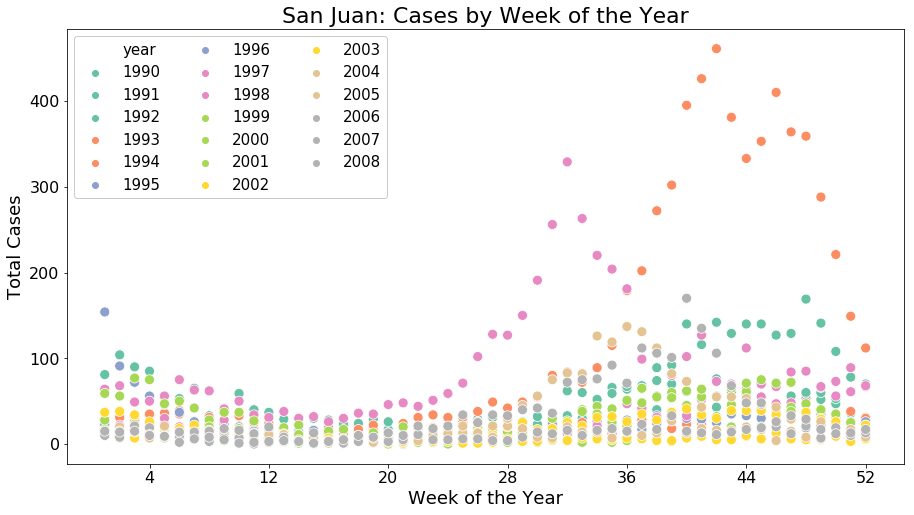

In [15]:
plt.figure(figsize=[15,8])
plt.title('San Juan: Cases by Week of the Year', size=22)
sns.scatterplot(x='weekofyear_fixed',y='total_cases', hue='year', s=100,
                data=sj, palette='Set2',legend='full')
plt.legend(loc=2, framealpha=1, ncol=3, prop={'size': 15})    
plt.ylabel('Total Cases',size=18)
plt.xlabel('Week of the Year',size=18)
plt.xticks([4,12,20,28,36,44,52], size=16)
plt.yticks(size=16)
plt.show()

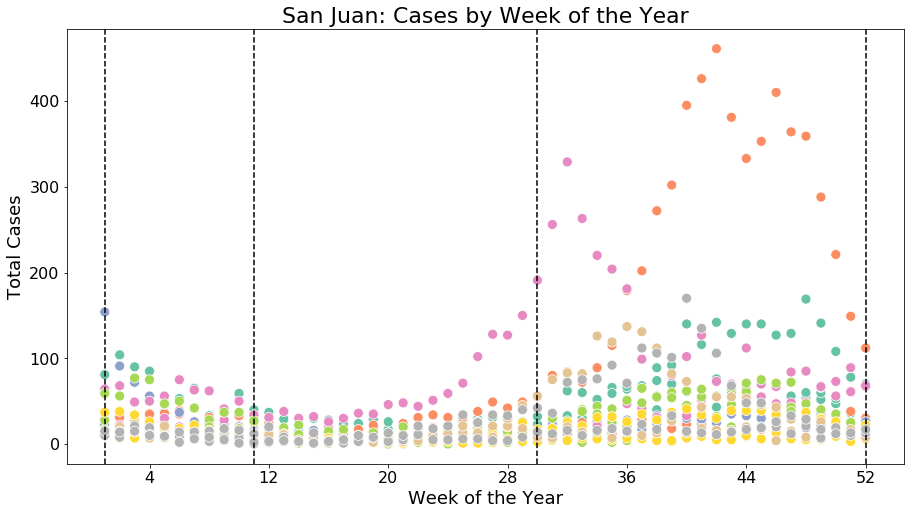

In [18]:
plt.figure(figsize=[15,8])
plt.title('San Juan: Cases by Week of the Year', size=22)
sns.scatterplot(x='weekofyear_fixed',y='total_cases', hue='year', s=100,
                data=sj, palette='Set2',legend=None)

plot_windows = [1,11,30,52]
for w in plot_windows:
    plt.axvline(w, linestyle='--',color='black')
plt.ylabel('Total Cases',size=18)
plt.xlabel('Week of the Year',size=18)
plt.xticks([4,12,20,28,36,44,52], size=16)
plt.yticks(size=16)
plt.show()

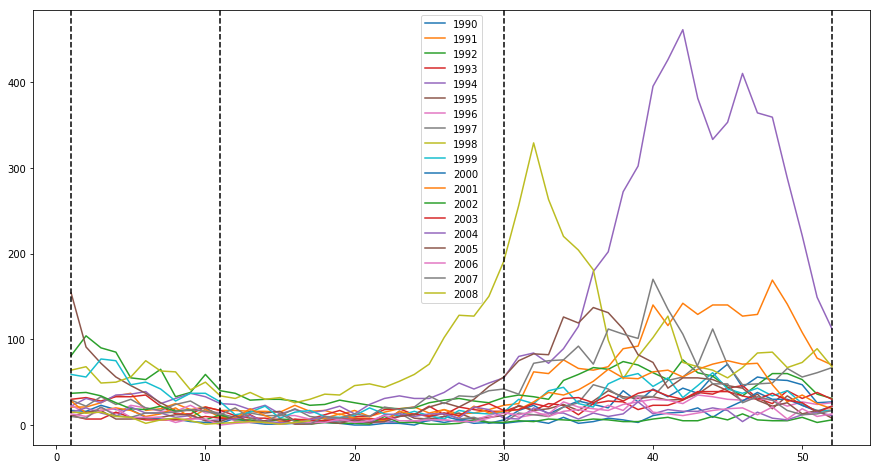

In [13]:
plt.figure(figsize=[15,8])
for year in [x for x in sj.year.unique() if x not in []]:
    plt.plot(sj[sj.year==year].weekofyear_fixed, sj[sj.year==year].total_cases, label=year)
plot_windows = [1,11,30,52]
for w in plot_windows:
    plt.axvline(w, linestyle='--',color='black')
plt.legend()
plt.show()

## Does test data have this date issue?

In [14]:
testdata = pd.read_csv('data/dengue_features_test.csv')
sjtest = testdata[testdata.city=='sj'].copy()

In [6]:
for year in sjtest.year.unique():
    print(year,sjtest[sjtest.year==year]['weekofyear'].unique(),'\n')

2008 [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52] 

2009 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52] 

2010 [53  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51] 

2011 [52  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51] 

2012 [52  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51] 

2013 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17] 



In [15]:
sjtest.loc[:,'weekofyear_fixed'] = np.where(sjtest.year==2010,
                                              sjtest.weekofyear+1, sjtest.weekofyear) 
for year in [2011,2012]:
    sjtest.loc[:,'weekofyear_fixed'] = np.where(sjtest.year==year,
                                                  sjtest.weekofyear_fixed+1, sjtest.weekofyear_fixed)
sjtest.loc[:,'weekofyear'] = np.where(sjtest.weekofyear_fixed>52,
                                        1, sjtest.weekofyear_fixed)
for year in sjtest.year.unique():
    print(year,sjtest[sjtest.year==year]['weekofyear'].unique(),'\n')

2008 [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52] 

2009 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52] 

2010 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52] 

2011 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52] 

2012 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52] 

2013 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17] 



## No feature Engineering besides interpolated nans and a week correction

In [6]:
X = sj.drop(['week_start_date', 'total_cases', 'city', 'year', 'weekofyear'], axis=1)
y = sj.total_cases

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)

(655, 20)
(281, 20)


#### Linear Regression

In [8]:
regr = LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)
print(cross_val_score(regr,X_test,y_test,scoring='neg_mean_absolute_error', cv=3))
print(mean_absolute_error(y_test,y_pred,multioutput='uniform_average'))

[-36.07671657 -32.66340802 -40.00211406]
28.900193229740747


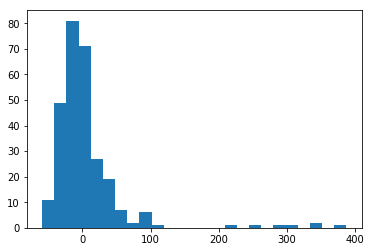

In [9]:
residual = y_test - y_pred
plt.hist(residual, bins=25)
plt.show()

### Random Forest Regressor

In [10]:
rfr = RandomForestRegressor(max_depth=20, n_estimators=50, criterion='mae')
rfr.fit(X_train,y_train)
y_pred = rfr.predict(X_test)
print(mean_absolute_error(y_test,y_pred,multioutput='uniform_average'))
print(cross_val_score(rfr,X_test,y_test,scoring='neg_mean_absolute_error', cv=3))

29.054128113879
[-30.94946809 -30.99606383 -35.82634409]


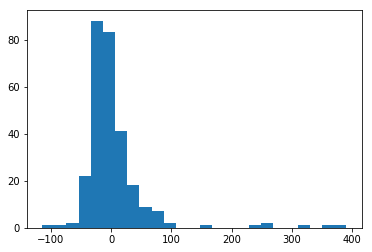

In [11]:
residual = y_test - y_pred
plt.hist(residual, bins=25)
plt.show()

### KNN Regressor

In [12]:
knn = KNeighborsRegressor(n_neighbors=10, weights='distance')
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(mean_absolute_error(y_test,y_pred,multioutput='uniform_average'))
print(cross_val_score(knn,X_test,y_test,scoring='neg_mean_absolute_error', cv=3))

31.497409309875845
[-33.07919592 -36.85411138 -38.89733594]


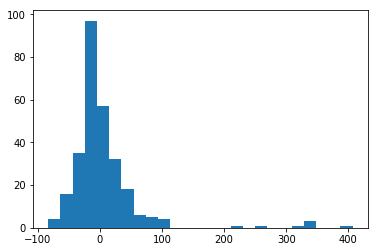

In [13]:
residual = y_test - y_pred
plt.hist(residual, bins=25)
plt.show()

###  Gradient Boosting Regressor

In [14]:
gbr = GradientBoostingRegressor(criterion='mae',max_depth=3,
                                learning_rate=.01, n_estimators=100)
gbr.fit(X_train,y_train)
y_pred = gbr.predict(X_test)
print(mean_absolute_error(y_test,y_pred,multioutput='uniform_average'))
print(cross_val_score(gbr,X_test,y_test,scoring='neg_mean_absolute_error', cv=3))

28.13620787808713
[-25.7950871  -26.25774262 -32.51146698]


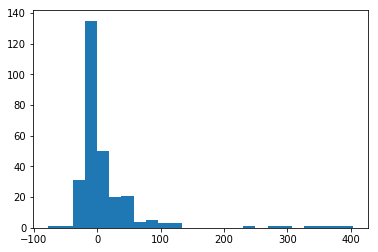

In [15]:
residual = y_test - y_pred
plt.hist(residual, bins=25)
plt.show()

### Negative Binomial Regression

In [16]:
smX_train = X_train
smX_train['total_cases'] = y_train
smX_test = X_test
smX_test['total_cases'] = y_test

c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [17]:
#create statsmodels formula
formula = 'total_cases ~ '
for i in X.columns:
    formula = formula + str(i) + ' + '
formula =  formula[:-3] #trim the last plus sign
formula

'total_cases ~ ndvi_ne + ndvi_nw + ndvi_se + ndvi_sw + precipitation_amt_mm + reanalysis_air_temp_k + reanalysis_avg_temp_k + reanalysis_dew_point_temp_k + reanalysis_max_air_temp_k + reanalysis_min_air_temp_k + reanalysis_precip_amt_kg_per_m2 + reanalysis_relative_humidity_percent + reanalysis_sat_precip_amt_mm + reanalysis_specific_humidity_g_per_kg + reanalysis_tdtr_k + station_avg_temp_c + station_diur_temp_rng_c + station_max_temp_c + station_min_temp_c + station_precip_mm'

In [18]:
model = smf.glm(formula=formula, data=smX_train, 
               family=sm.families.NegativeBinomial(alpha=1e-6))

In [19]:
results = model.fit()
predictions = results.predict(smX_test).astype(int)
score = eval_measures.meanabs(predictions, smX_test.total_cases)
score

28.654804270462634

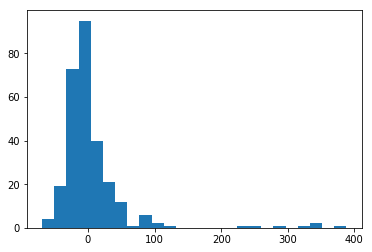

In [20]:
residual = y_test - predictions
plt.hist(residual, bins=25)
plt.show()

# Feature Engineering 

In [21]:
[x for x in sj.columns]

['city',
 'year',
 'weekofyear',
 'week_start_date',
 'ndvi_ne',
 'ndvi_nw',
 'ndvi_se',
 'ndvi_sw',
 'precipitation_amt_mm',
 'reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_relative_humidity_percent',
 'reanalysis_sat_precip_amt_mm',
 'reanalysis_specific_humidity_g_per_kg',
 'reanalysis_tdtr_k',
 'station_avg_temp_c',
 'station_diur_temp_rng_c',
 'station_max_temp_c',
 'station_min_temp_c',
 'station_precip_mm',
 'total_cases']

### Temperature

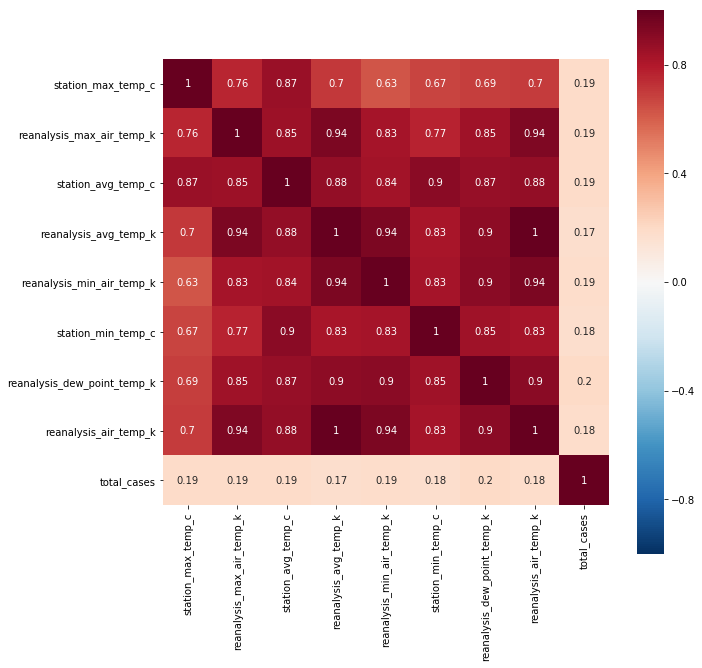

In [22]:
temps = sj[['station_max_temp_c',
            'reanalysis_max_air_temp_k',
            'station_avg_temp_c',
            'reanalysis_avg_temp_k',
            'reanalysis_min_air_temp_k',
            'station_min_temp_c',
            'reanalysis_dew_point_temp_k',
            'reanalysis_air_temp_k',
           'total_cases', ]].copy()
plt.figure(figsize=[10,10])
sns.heatmap(temps.corr(),square=True, vmin=-1, vmax=1, 
                center=0, cmap='RdBu_r', annot=True)
plt.show()

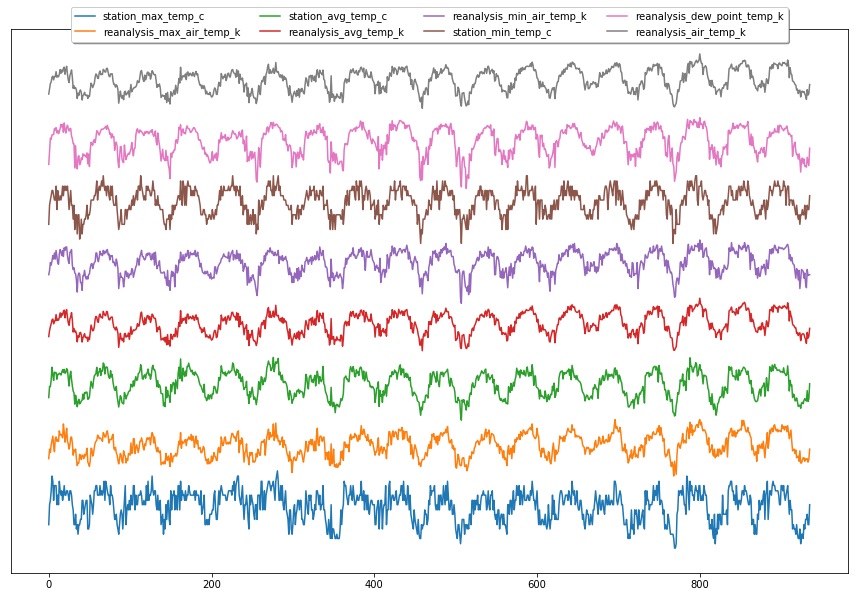

In [23]:
plt.figure(figsize=[15,10])
offset = 0
for i in temps:
    if i != 'total_cases':
        plt.plot(sj[i] - np.mean(sj[i]) + offset, label=i)
        offset+=7
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=4, fancybox=True, shadow=True)
plt.yticks([])
plt.show()

In [24]:
temps['weekofyear'] = sj.weekofyear

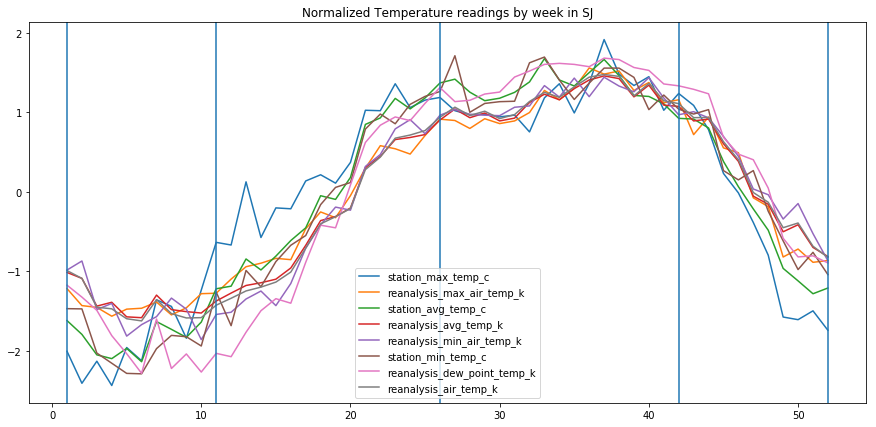

In [25]:
plt.figure(figsize=[15,7])
plt.title('Normalized Temperature readings by week in SJ')
for i in temps:
    if i != 'total_cases' and i != 'weekofyear':
        plt.plot(temps.groupby('weekofyear')[i].mean() - 
                 temps[i].mean(),
            label=i)
#Approximations of seasons
plt.axvline(x=[1])
plt.axvline(x=[11])
plt.axvline(x=[26])
plt.axvline(x=[42])
plt.axvline(x=[52])

plt.legend()
plt.show()

#### Conclusion: Temperature

Most of these temperature measurements are very correlated. I will keep station_max_temp_c, as that differs in a few key areas, but besides that I will simply average the rest after scaling them to be on the same range.

I will also create features to indicate the 4 seasons.

In [16]:
feats = sj[['city', 'year', 'weekofyear', 'total_cases', 'station_max_temp_c']].copy()

In [17]:
tempscols_to_average = sj.loc[:,['reanalysis_max_air_temp_k', 'station_avg_temp_c',
       'reanalysis_avg_temp_k', 'reanalysis_min_air_temp_k',
       'station_min_temp_c', 'reanalysis_dew_point_temp_k',
       'reanalysis_air_temp_k']]

scaled_temps = pd.DataFrame(MinMaxScaler().fit_transform(tempscols_to_average), 
                            columns=tempscols_to_average.columns)

In [18]:
feats.loc[:,'temps_mean'] = scaled_temps.mean(axis=1)

In [19]:
cutoffs = [11, 26, 42]
feats['winter'] = np.where((feats.weekofyear<cutoffs[0]), 1, 0)

feats['spring'] = np.where((feats.weekofyear>=cutoffs[0]) &
                           (feats.weekofyear<cutoffs[1]), 1, 0)
feats['summer'] = np.where((feats.weekofyear>=cutoffs[1]) &
                           (feats.weekofyear<cutoffs[2]), 1, 0)
feats['fall'] = np.where((feats.weekofyear>=cutoffs[2]), 1, 0)

In [20]:
feats.groupby('weekofyear')[['winter','spring','summer','fall']].sum()
#We'll want to drop one of the boolean seasons for any models that don't
#use regularization
feats.corr()['total_cases']

year                 -0.212690
weekofyear            0.287134
total_cases           1.000000
station_max_temp_c    0.188447
temps_mean            0.197005
winter               -0.088709
spring               -0.274548
summer                0.164571
fall                  0.204183
Name: total_cases, dtype: float64

### Other temperature measurements and humidity

In [31]:
othertemps = ['total_cases','station_diur_temp_rng_c', 'reanalysis_tdtr_k','reanalysis_relative_humidity_percent',
       'reanalysis_specific_humidity_g_per_kg']
sj[othertemps].corr()

,total_cases,station_diur_temp_rng_c,reanalysis_tdtr_k,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg
total_cases,1.000000,0.035303,-0.067623,0.144404,0.206942
station_diur_temp_rng_c,0.035303,1.000000,0.372414,-0.193181,-0.057291
reanalysis_tdtr_k,-0.067623,0.372414,1.000000,-0.374547,-0.025810
reanalysis_relative_humidity_percent,0.144404,-0.193181,-0.374547,1.000000,0.673010
reanalysis_specific_humidity_g_per_kg,0.206942,-0.057291,-0.025810,0.673010,1.000000


##### Temperature Range appears mostly useless, and it's seasonality should be captured by the temperature feature

c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


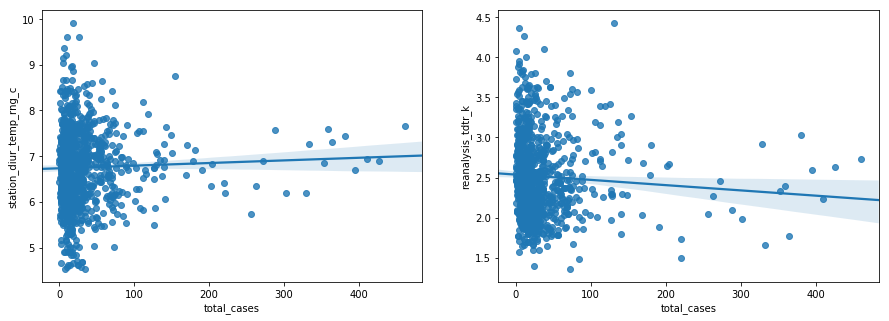

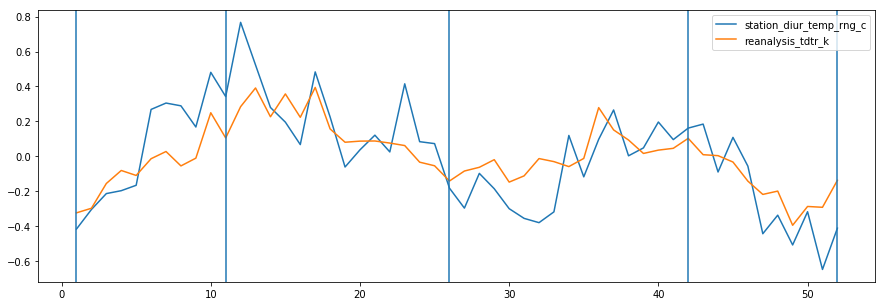

In [32]:
v = 'station_diur_temp_rng_c'
v2 = 'reanalysis_tdtr_k'

plt.figure(figsize=[15,5])
plt.subplot(121)
sns.regplot(sj.total_cases, sj[v])
plt.subplot(122)
sns.regplot(sj.total_cases, sj[v2])
plt.show()
plt.figure(figsize=[15,5])

plt.plot(sj.groupby('weekofyear')[v].mean() - 
                 sj[v].mean(),
            label=v)

plt.plot(sj.groupby('weekofyear')[v2].mean() - 
                 sj[v2].mean(),
            label=v2)
#Approximations of seasons
plt.axvline(x=[1])
plt.axvline(x=[11])
plt.axvline(x=[26])
plt.axvline(x=[42])
plt.axvline(x=[52])
plt.legend()
plt.show()

c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


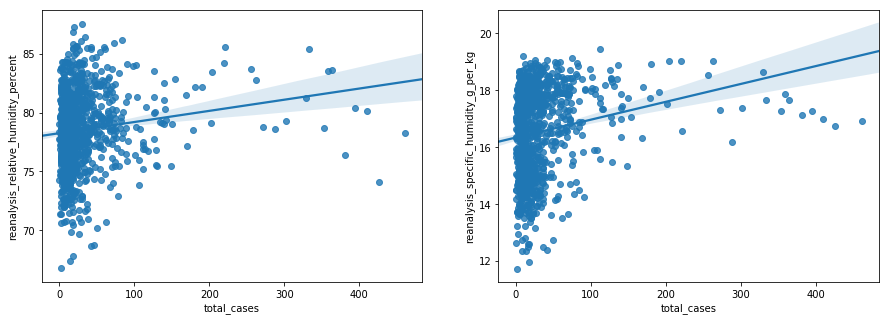

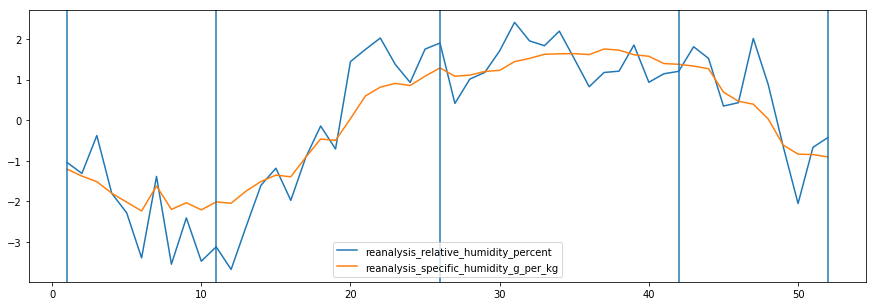

In [33]:
v = 'reanalysis_relative_humidity_percent'
v2 = 'reanalysis_specific_humidity_g_per_kg'

plt.figure(figsize=[15,5])
plt.subplot(121)
sns.regplot(sj.total_cases, sj[v])
plt.subplot(122)
sns.regplot(sj.total_cases, sj[v2])
plt.show()
plt.figure(figsize=[15,5])

plt.plot(sj.groupby('weekofyear')[v].mean() - 
                 sj[v].mean(),
            label=v)

plt.plot(sj.groupby('weekofyear')[v2].mean() - 
                 sj[v2].mean(),
            label=v2)
#Approximations of seasons
plt.axvline(x=[1])
plt.axvline(x=[11])
plt.axvline(x=[26])
plt.axvline(x=[42])
plt.axvline(x=[52])
plt.legend()
plt.show()

#### Conclusion: Humidity and temperature range

I will not include the temperature ranges. The humidity measurements appear to be useful and one is a more volatile version of the other. for now I will include them both, but I may consider PCA to combine them at a later point.

In [21]:
v = 'reanalysis_relative_humidity_percent'
v2 = 'reanalysis_specific_humidity_g_per_kg'
feats.loc[:,v] = sj[v]
feats.loc[:,v2] = sj[v2]
feats.corr()['total_cases']

year                                    -0.212690
weekofyear                               0.287134
total_cases                              1.000000
station_max_temp_c                       0.188447
temps_mean                               0.197005
winter                                  -0.088709
spring                                  -0.274548
summer                                   0.164571
fall                                     0.204183
reanalysis_relative_humidity_percent     0.144404
reanalysis_specific_humidity_g_per_kg    0.206942
Name: total_cases, dtype: float64

### Rain

In [35]:
rain = ['total_cases',
       'precipitation_amt_mm', 
       'reanalysis_precip_amt_kg_per_m2',
       #'reanalysis_sat_precip_amt_mm', # identical to precipitation_amt_mm
       'station_precip_mm']
sj[rain].corr()

,total_cases,precipitation_amt_mm,reanalysis_precip_amt_kg_per_m2,station_precip_mm
total_cases,1.000000,0.060296,0.106939,0.051883
precipitation_amt_mm,0.060296,1.000000,0.508274,0.566660
reanalysis_precip_amt_kg_per_m2,0.106939,0.508274,1.000000,0.477984
station_precip_mm,0.051883,0.566660,0.477984,1.000000


c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


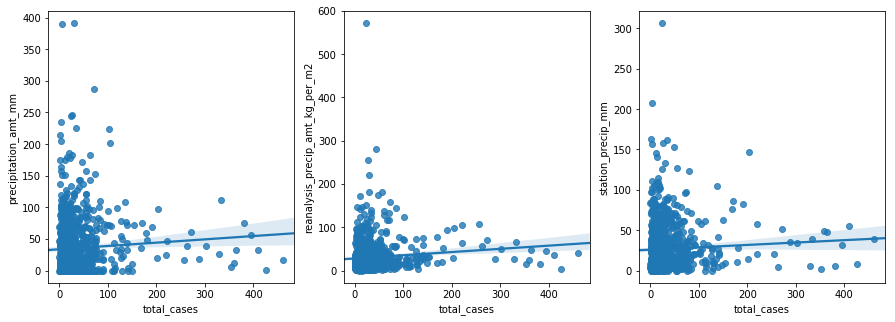

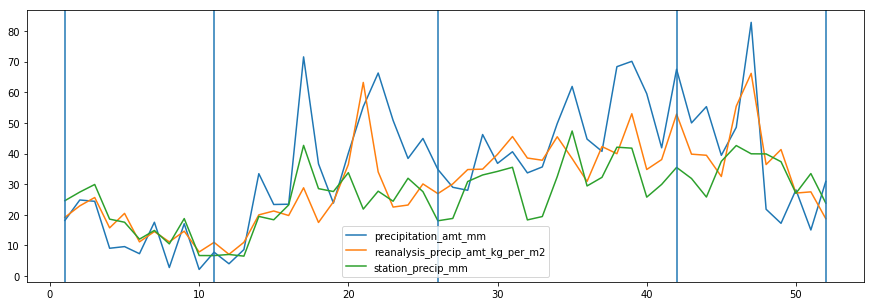

In [36]:
v = 'precipitation_amt_mm'
v2 = 'reanalysis_precip_amt_kg_per_m2'
v3 = 'station_precip_mm'

plt.figure(figsize=[15,5])
plt.subplot(131)
sns.regplot(sj.total_cases, sj[v])
plt.subplot(132)
sns.regplot(sj.total_cases, sj[v2])
plt.subplot(133)
sns.regplot(sj.total_cases, sj[v3])
plt.show()
plt.figure(figsize=[15,5])

plt.plot(sj.groupby('weekofyear')[v].mean(), 
            label=v)
plt.plot(sj.groupby('weekofyear')[v2].mean(),
            label=v2)
plt.plot(sj.groupby('weekofyear')[v3].mean(), 
            label=v3)
#Approximations of seasons
plt.axvline(x=[1])
plt.axvline(x=[11])
plt.axvline(x=[26])
plt.axvline(x=[42])
plt.axvline(x=[52])
plt.legend()
plt.show()

#### Conclusion: Rain

I will include only the strongest correlated variable, reanalysis_precip_amt_kg_per_m2

In [22]:
v = 'reanalysis_precip_amt_kg_per_m2'
feats.loc[:,v] = sj[v]
feats.corr()['total_cases']

year                                    -0.212690
weekofyear                               0.287134
total_cases                              1.000000
station_max_temp_c                       0.188447
temps_mean                               0.197005
winter                                  -0.088709
spring                                  -0.274548
summer                                   0.164571
fall                                     0.204183
reanalysis_relative_humidity_percent     0.144404
reanalysis_specific_humidity_g_per_kg    0.206942
reanalysis_precip_amt_kg_per_m2          0.106939
Name: total_cases, dtype: float64

### Vegetation

In [38]:
vegs = ['total_cases', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw']
sj[vegs].corr()

,total_cases,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw
total_cases,1.000000,0.085918,0.047403,-0.043680,0.042670
ndvi_ne,0.085918,1.000000,0.632660,0.219353,0.181035
ndvi_nw,0.047403,0.632660,1.000000,0.197311,0.217740
ndvi_se,-0.043680,0.219353,0.197311,1.000000,0.814621
ndvi_sw,0.042670,0.181035,0.217740,0.814621,1.000000


c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


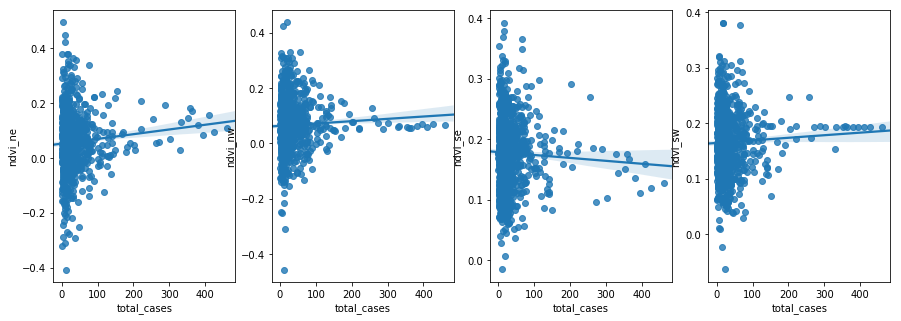

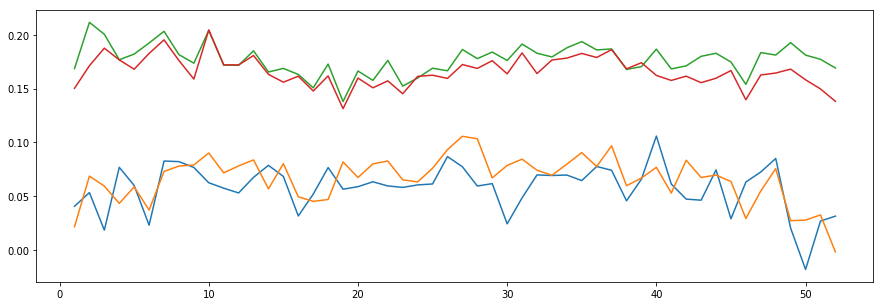

In [39]:
plt.figure(figsize=[15,5])
for i,col in enumerate(vegs[1:]):
    plt.subplot(1,4,i+1)
    sns.regplot(sj.total_cases, sj[col])
plt.show()

plt.figure(figsize=[15,5])
for v in vegs[1:]:
    plt.plot(sj.groupby('weekofyear')[v].mean(), 
            label=v)
plt.show()

#### Conclusion: Vegetation
Excluded

# Modelling with chosen features

In [23]:
def examine(y_pred, y_test):
    c = pd.DataFrame({
        'y' : y_test,
        'p' : y_pred
     })
    c = c.sort_index()
    plt.figure(figsize=[15,4])
    plt.plot(c.y, color='green')
    plt.plot(c.p, color='red')
    plt.show()

In [41]:
feats.head()

,city,year,weekofyear,total_cases,station_max_temp_c,temps_mean,winter,spring,summer,fall,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg,reanalysis_precip_amt_kg_per_m2
0,sj,1990,18,4,29.4,0.324516,0,1,0,0,73.365714,14.012857,32.00
1,sj,1990,19,5,31.7,0.481929,0,1,0,0,77.368571,15.372857,17.94
2,sj,1990,20,4,32.2,0.551015,0,1,0,0,82.052857,16.848571,26.10
3,sj,1990,21,3,33.3,0.599826,0,1,0,0,80.337143,16.672857,13.90
4,sj,1990,22,6,35.0,0.692043,0,1,0,0,80.460000,17.210000,12.20


In [24]:
X = feats.drop(['total_cases', 'city', 'year', 'weekofyear', 'winter'], axis=1)
X2 = feats.drop(['total_cases', 'city', 'year', 'weekofyear'], axis=1) #for regularizing techniques
y = feats.total_cases

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)

(655, 8)
(281, 8)


#### Linear Regression

In [44]:
regr = LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)
print(cross_val_score(regr,X_test,y_test,scoring='neg_mean_absolute_error', cv=3))
print(mean_absolute_error(y_test,y_pred,multioutput='uniform_average'))

[-32.58569606 -34.48234546 -34.81512314]
29.22065482996304


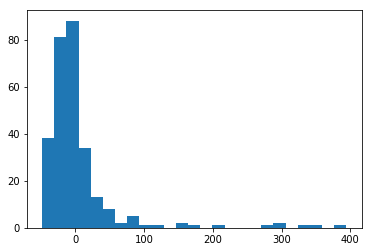

In [45]:
residual = y_test - y_pred
plt.hist(residual, bins=25)
plt.show()

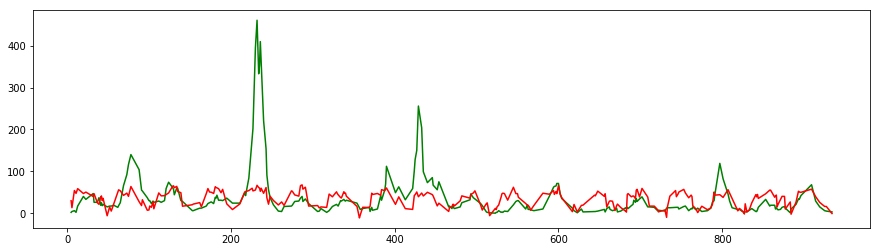

In [46]:
examine(y_pred, y_test)

### Random Forest Regressor

In [47]:
rfr = RandomForestRegressor(max_depth=50, n_estimators=200, criterion='mae')
rfr.fit(X_train,y_train)
y_pred = rfr.predict(X_test)
print(mean_absolute_error(y_test,y_pred,multioutput='uniform_average'))
print(cross_val_score(rfr,X_test,y_test,scoring='neg_mean_absolute_error', cv=3))

27.854911032028465
[-31.5437766  -34.82571809 -36.75553763]


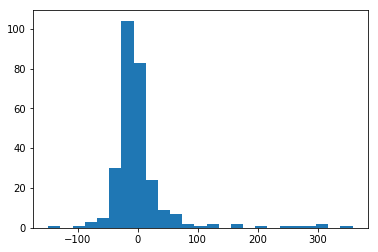

In [48]:
residual = y_test - y_pred
plt.hist(residual, bins=25)
plt.show()

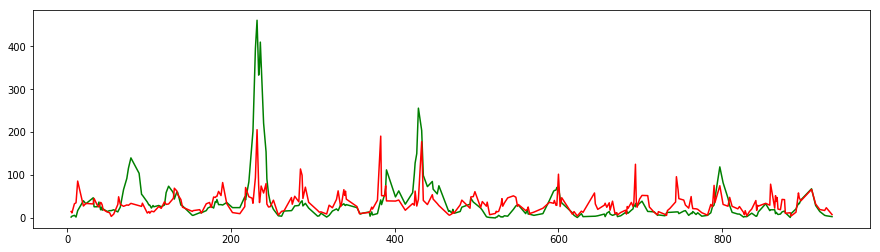

In [49]:
examine(y_pred, y_test)

### KNN Regressor

In [50]:
knn = KNeighborsRegressor(n_neighbors=10, weights='distance')
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(mean_absolute_error(y_test,y_pred,multioutput='uniform_average'))
print(cross_val_score(knn,X_test,y_test,scoring='neg_mean_absolute_error', cv=3))

31.26961025399289
[-32.35275945 -37.05916835 -40.56972232]


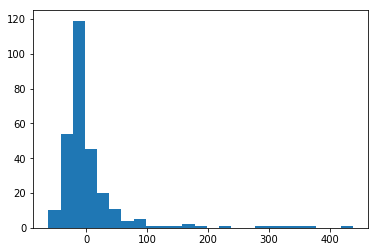

In [51]:
residual = y_test - y_pred
plt.hist(residual, bins=25)
plt.show()

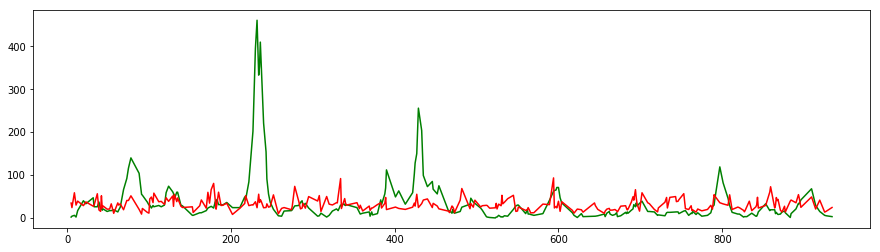

In [52]:
examine(y_pred, y_test)

###  Gradient Boosting Regressor

In [53]:
gbr = GradientBoostingRegressor(criterion='mae',max_depth=2,
                                learning_rate=.01, n_estimators=100)
gbr.fit(X_train,y_train)
y_pred = gbr.predict(X_test)
print(mean_absolute_error(y_test,y_pred,multioutput='uniform_average'))
print(cross_val_score(gbr,X_test,y_test,scoring='neg_mean_absolute_error', cv=3))

26.793308675246067
[-23.27717255 -29.85728133 -33.94627354]


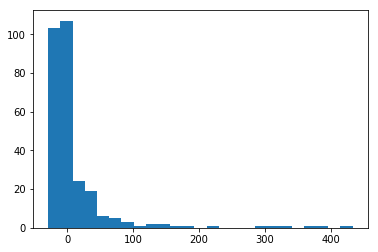

In [54]:
residual = y_test - y_pred
plt.hist(residual, bins=25)
plt.show()

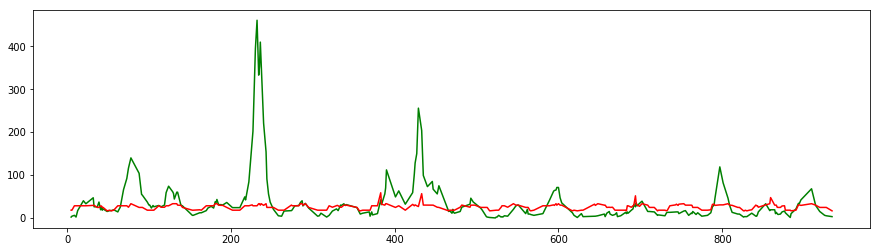

In [55]:
examine(y_pred, y_test)

###  Support Vector Regression

In [56]:
svr = SVR(gamma='auto')
svr.fit(X_train,y_train)
y_pred = svr.predict(X_test)
print(mean_absolute_error(y_test,y_pred,multioutput='uniform_average'))
print(cross_val_score(svr,X_test,y_test,scoring='neg_mean_absolute_error', cv=3))

28.18081962627673
[-22.6299787  -27.65210481 -34.8001432 ]


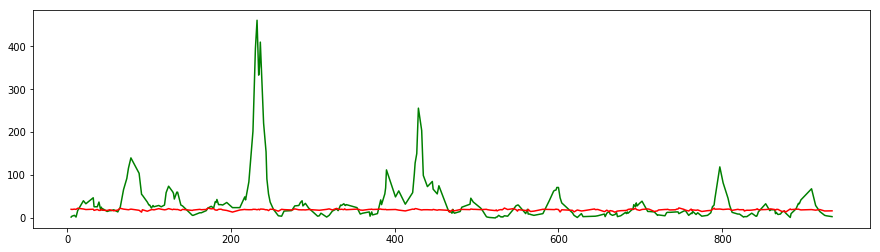

In [57]:
examine(y_pred, y_test)

### Negative Binomial Regression

In [26]:
smX_train = X_train.copy()
smX_train.loc[:,'total_cases'] = y_train
smX_test = X_test.copy()
smX_test.loc[:,'total_cases'] = y_test

In [27]:
#create statsmodels formula
formula = 'total_cases ~ '
for i in X.columns:
    formula = formula + str(i) + ' + '
formula =  formula[:-3] #trim the last plus sign
formula

'total_cases ~ station_max_temp_c + temps_mean + spring + summer + fall + reanalysis_relative_humidity_percent + reanalysis_specific_humidity_g_per_kg + reanalysis_precip_amt_kg_per_m2'

In [28]:
model = smf.glm(formula=formula, data=smX_train, 
               family=sm.families.NegativeBinomial(alpha=1e-6))

In [29]:
results = model.fit()
predictions = results.predict(smX_test).astype(int)
score = eval_measures.meanabs(predictions, smX_test.total_cases)
score

24.427046263345197

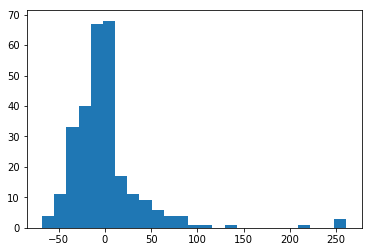

In [30]:
residual = y_test - predictions
plt.hist(residual, bins=25)
plt.show()

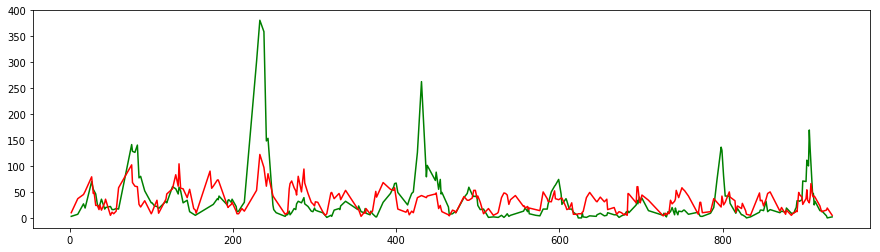

In [31]:
examine(predictions, y_test)

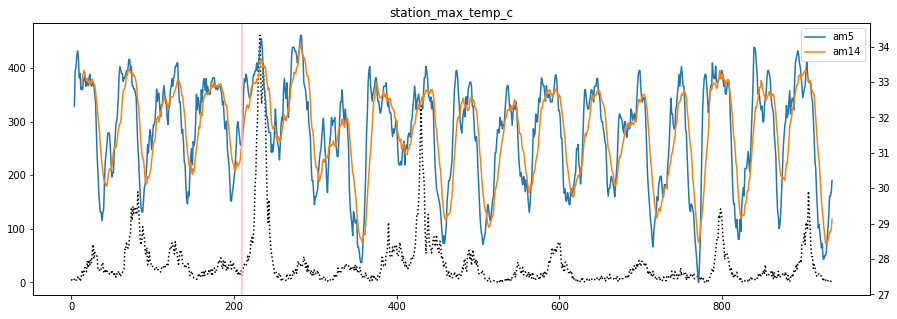

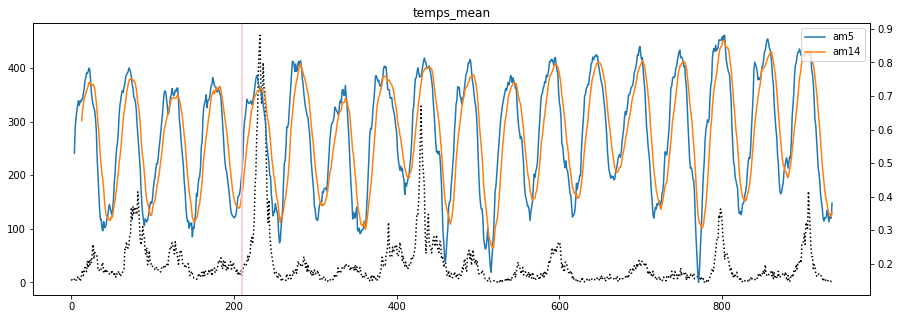

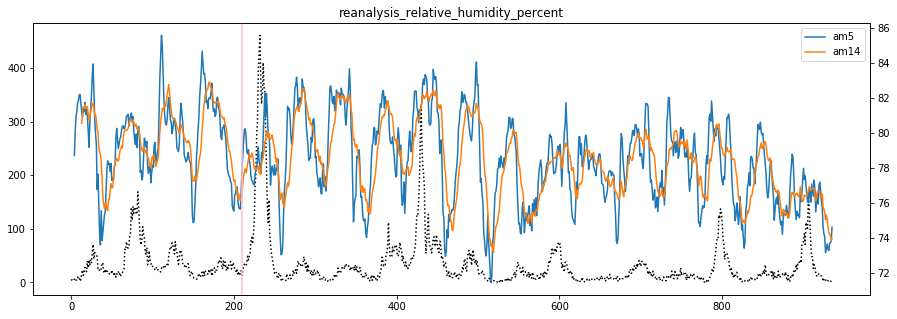

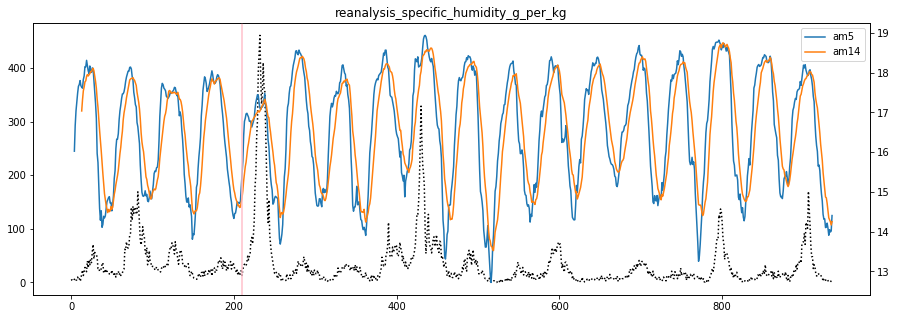

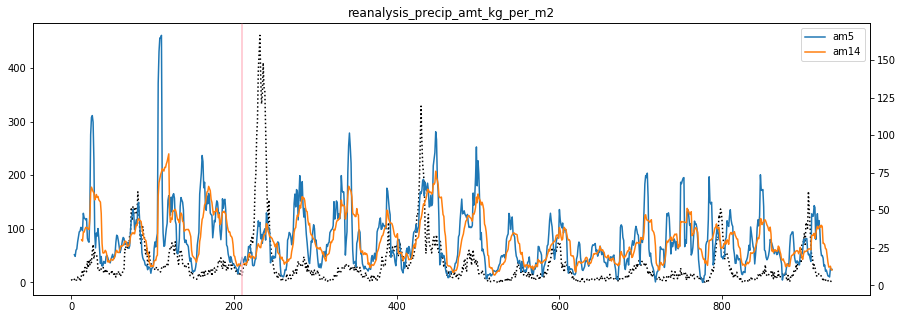

In [64]:
#Looking for leading indicators in moving averages?
toplot = ['station_max_temp_c',
       'temps_mean',
       'reanalysis_relative_humidity_percent',
       'reanalysis_specific_humidity_g_per_kg',
       'reanalysis_precip_amt_kg_per_m2']

for var in toplot:
    df = pd.DataFrame({
        'total_cases': feats['total_cases'],
        var : feats[var],
    })
    fig, ax1 = plt.subplots(figsize=(15,5))
    ax1.plot(df['total_cases'], ':',label='total_cases', color='black')
    ax2 = ax1.twinx()
    for w in [5,14]:
        ax2.plot(df.rolling(window=w)[var].mean(), label='am'+str(w))
    plt.axvline(x=210, color='pink')
    plt.legend(loc=1)
    plt.title(var)
    plt.show()    

In [65]:
toplot2 = ['station_max_temp_c', 'station_avg_temp_c',
       'reanalysis_relative_humidity_percent',
       'reanalysis_specific_humidity_g_per_kg',
       'reanalysis_precip_amt_kg_per_m2',
       'precipitation_amt_mm', 'station_precip_mm']

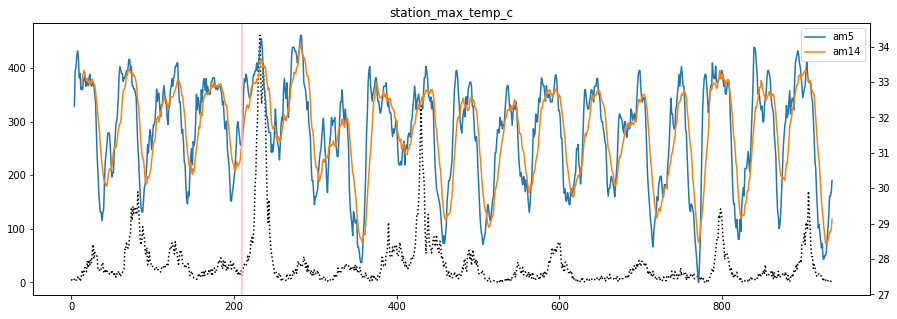

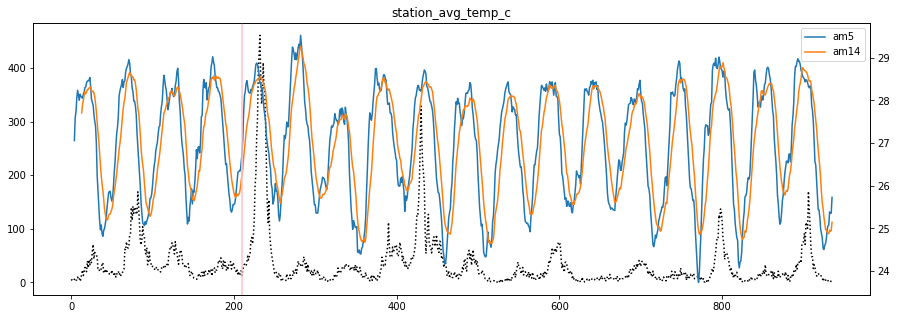

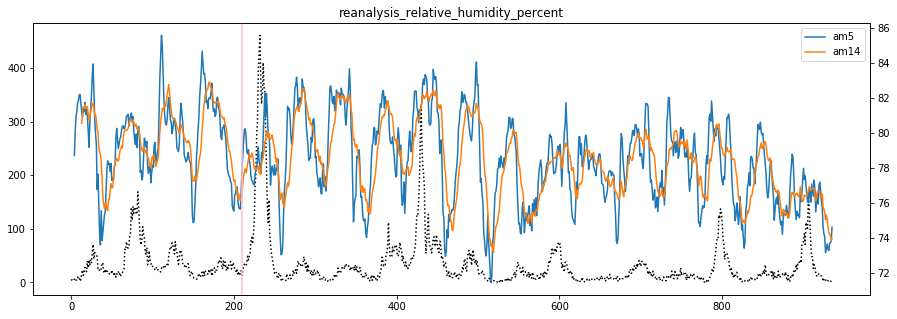

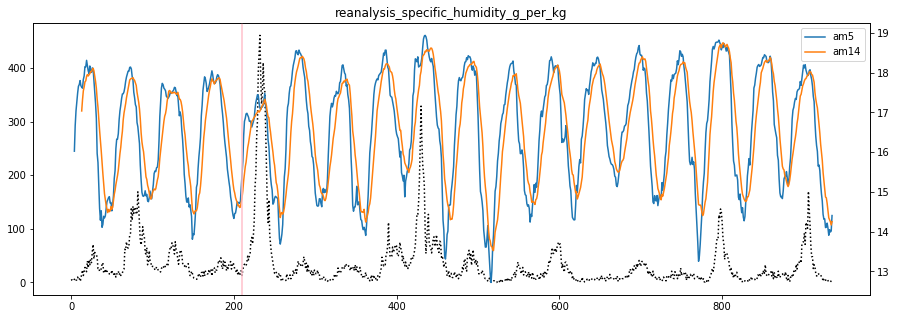

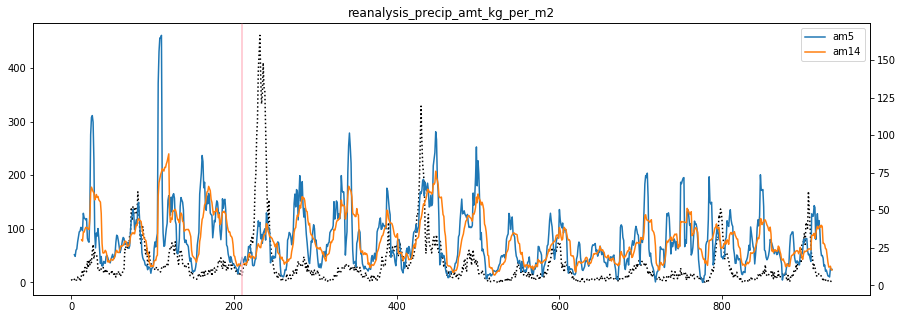

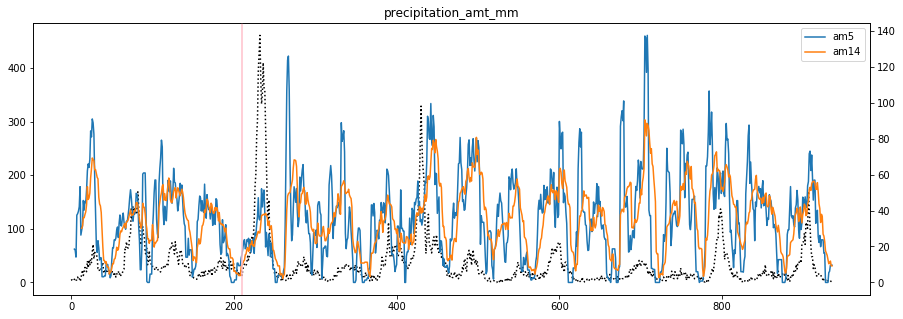

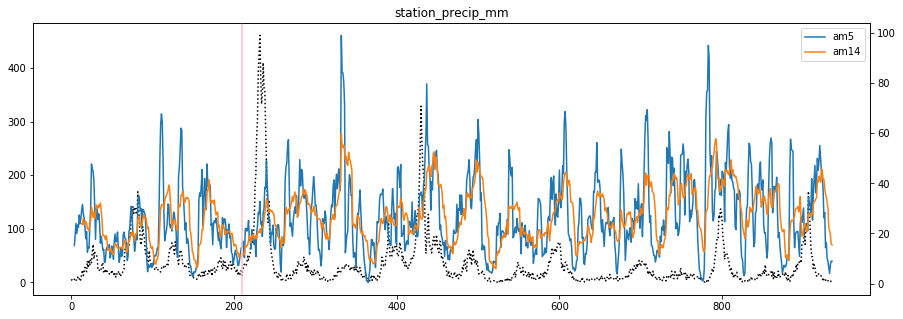

In [66]:
rawfeats2 = sj.interpolate(method='linear')
for var in toplot2:
    df = pd.DataFrame({
        'total_cases': rawfeats2['total_cases'],
        var : rawfeats2[var],
    })
    fig, ax1 = plt.subplots(figsize=(15,5))
    ax1.plot(df['total_cases'], ':',label='total_cases', color='black')
    ax2 = ax1.twinx()
    for w in [5,14]:
        ax2.plot(df.rolling(window=w)[var].mean(), label='am'+str(w))
    plt.axvline(x=210, color='pink')
    plt.legend(loc=0)
    plt.title(var)
    plt.show()    

## Adding a TON of lagged features

In [67]:

feats.columns

Index(['city', 'year', 'weekofyear', 'total_cases', 'station_max_temp_c',
       'temps_mean', 'winter', 'spring', 'summer', 'fall',
       'reanalysis_relative_humidity_percent',
       'reanalysis_specific_humidity_g_per_kg',
       'reanalysis_precip_amt_kg_per_m2'],
      dtype='object')

In [68]:
sjshiftedfeats = feats[['city', 'year', 'weekofyear', 'total_cases',
                      'winter', 'spring', 'summer', 'fall']].copy()
for i in ['station_max_temp_c', 'temps_mean',
          'reanalysis_relative_humidity_percent',
       'reanalysis_specific_humidity_g_per_kg',
       'reanalysis_precip_amt_kg_per_m2']:
    sjshiftedfeats[i] = feats[i]
    sjshiftedfeats[i+'_1lag'] = feats[i].shift(-1)
    sjshiftedfeats[i+'_2lag'] = feats[i].shift(-2)
    sjshiftedfeats[i+'_3lag'] = feats[i].shift(-3)

sjshiftedfeats = sjshiftedfeats.fillna(method='ffill')
sjshiftedfeats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 0 to 935
Data columns (total 28 columns):
city                                          936 non-null object
year                                          936 non-null int64
weekofyear                                    936 non-null int64
total_cases                                   936 non-null int64
winter                                        936 non-null int32
spring                                        936 non-null int32
summer                                        936 non-null int32
fall                                          936 non-null int32
station_max_temp_c                            936 non-null float64
station_max_temp_c_1lag                       936 non-null float64
station_max_temp_c_2lag                       936 non-null float64
station_max_temp_c_3lag                       936 non-null float64
temps_mean                                    936 non-null float64
temps_mean_1lag                        

In [70]:
X = sjshiftedfeats.drop(['total_cases', 'city', 'year', 'weekofyear', 'winter'], axis=1)
X2 = sjshiftedfeats.drop(['total_cases', 'city', 'year', 'weekofyear'], axis=1) #for regularizing techniques
y = sjshiftedfeats.total_cases

In [71]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)

(655, 23)
(281, 23)


#### Linear Regression

In [72]:
regr = LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)
print(cross_val_score(regr,X_test,y_test,scoring='neg_mean_absolute_error', cv=3))
print(mean_absolute_error(y_test,y_pred,multioutput='uniform_average'))

[-30.13526537 -33.91340188 -31.37157307]
27.798968859620366


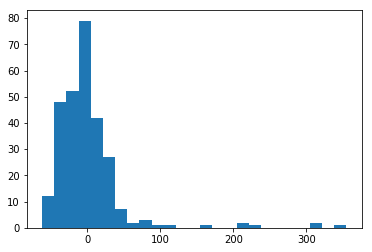

In [73]:
residual = y_test - y_pred
plt.hist(residual, bins=25)
plt.show()

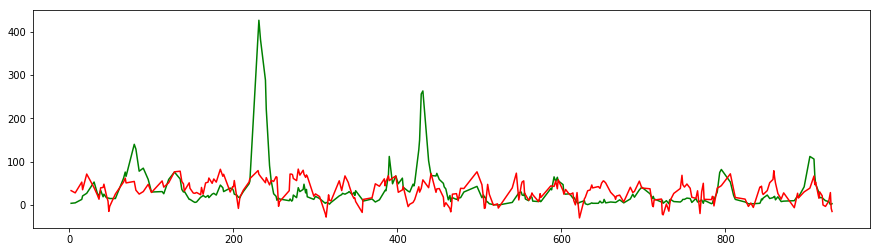

In [74]:
examine(y_pred, y_test)

### Random Forest Regressor

In [107]:
rfr = RandomForestRegressor(max_depth=50, n_estimators=200, criterion='mse')
rfr.fit(X_train,y_train)
y_pred = rfr.predict(X_test)
print(mean_absolute_error(y_test,y_pred,multioutput='uniform_average'))
print(cross_val_score(rfr,X_test,y_test,scoring='neg_mean_absolute_error', cv=3))

24.82193950177936
[-33.15941489 -32.29058511 -24.71543011]


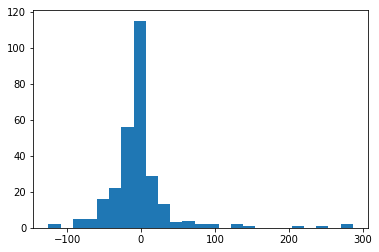

In [108]:
residual = y_test - y_pred
plt.hist(residual, bins=25)
plt.show()

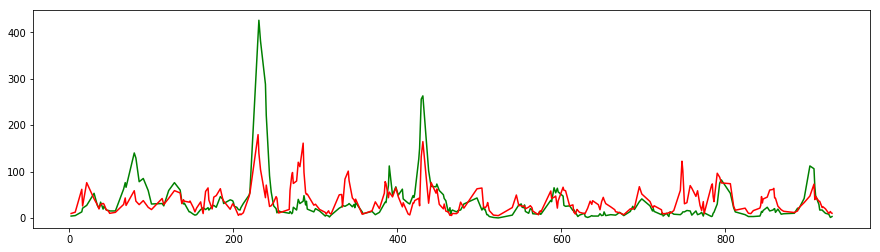

In [109]:
examine(y_pred, y_test)

In [110]:
[(X_train.columns[i], rfr.feature_importances_[i]) for i in range(len(X_train.columns))]

[('spring', 0.06961401214210144),
 ('summer', 0.002013992483978247),
 ('fall', 0.02265697067448838),
 ('station_max_temp_c', 0.053927394189752426),
 ('station_max_temp_c_1lag', 0.05847688761740395),
 ('station_max_temp_c_2lag', 0.050520867568293236),
 ('station_max_temp_c_3lag', 0.05726811229566735),
 ('temps_mean', 0.02964688022356863),
 ('temps_mean_1lag', 0.025899992665699458),
 ('temps_mean_2lag', 0.03149011995504953),
 ('temps_mean_3lag', 0.03508427854495817),
 ('reanalysis_relative_humidity_percent', 0.046436488754377246),
 ('reanalysis_relative_humidity_percent_1lag', 0.03600515662049409),
 ('reanalysis_relative_humidity_percent_2lag', 0.0633185771056876),
 ('reanalysis_relative_humidity_percent_3lag', 0.0760579973533026),
 ('reanalysis_specific_humidity_g_per_kg', 0.04185553546440796),
 ('reanalysis_specific_humidity_g_per_kg_1lag', 0.051422186837631216),
 ('reanalysis_specific_humidity_g_per_kg_2lag', 0.039496602317147904),
 ('reanalysis_specific_humidity_g_per_kg_3lag', 0.084

### KNN Regressor

In [78]:
knn = KNeighborsRegressor(n_neighbors=10, weights='distance')
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(mean_absolute_error(y_test,y_pred,multioutput='uniform_average'))
print(cross_val_score(knn,X_test,y_test,scoring='neg_mean_absolute_error', cv=3))

27.573789593592856
[-31.08236758 -25.36095578 -22.22161519]


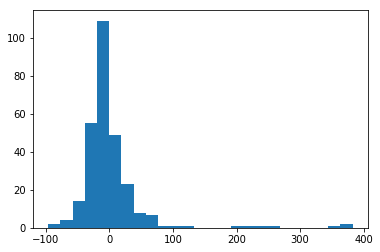

In [79]:
residual = y_test - y_pred
plt.hist(residual, bins=25)
plt.show()

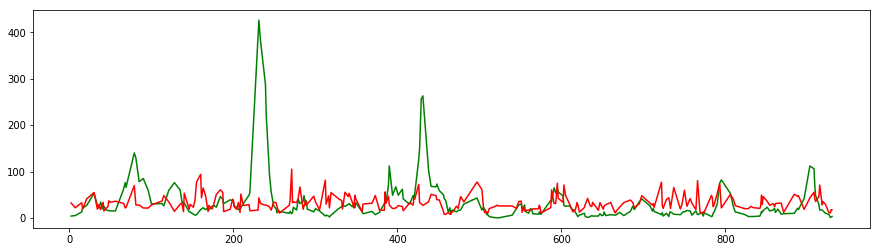

In [80]:
examine(y_pred, y_test)

###  Gradient Boosting Regressor

In [84]:
gbr = GradientBoostingRegressor(criterion='mae',max_depth=4,
                                learning_rate=.01, n_estimators=100)
gbr.fit(X_train,y_train)
y_pred = gbr.predict(X_test)
print(mean_absolute_error(y_test,y_pred,multioutput='uniform_average'))
print(cross_val_score(gbr,X_test,y_test,scoring='neg_mean_absolute_error', cv=3))

22.558408323275625
[-32.10343592 -31.57456335 -23.19668256]


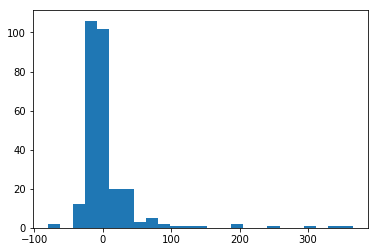

In [85]:
residual = y_test - y_pred
plt.hist(residual, bins=25)
plt.show()

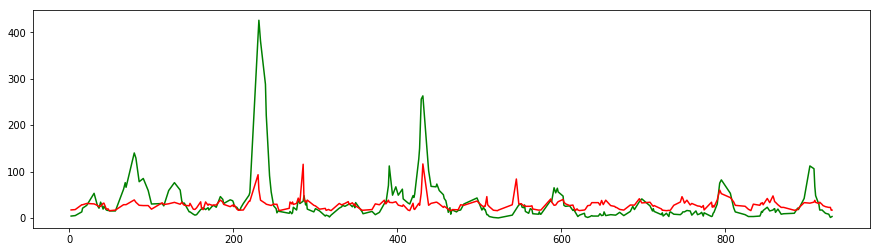

In [86]:
examine(y_pred, y_test)

###  Support Vector Regression

In [97]:
svr = SVR(gamma='scale', kernel='linear')
svr.fit(X_train,y_train)
y_pred = svr.predict(X_test)
print(mean_absolute_error(y_test,y_pred,multioutput='uniform_average'))
print(cross_val_score(svr,X_test,y_test,scoring='neg_mean_absolute_error', cv=3))

21.911152152836852
[-27.48726874 -20.82810583 -18.79253214]


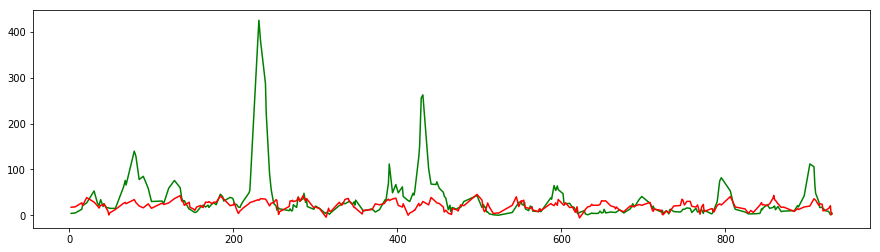

In [98]:
examine(y_pred, y_test)

### Negative Binomial Regression

In [99]:
smX_train = X_train.copy()
smX_train.loc[:,'total_cases'] = y_train
smX_test = X_test.copy()
smX_test.loc[:,'total_cases'] = y_test

In [100]:
#create statsmodels formula
formula = 'total_cases ~ '
for i in X.columns:
    formula = formula + str(i) + ' + '
formula =  formula[:-3] #trim the last plus sign
formula

'total_cases ~ spring + summer + fall + station_max_temp_c + station_max_temp_c_1lag + station_max_temp_c_2lag + station_max_temp_c_3lag + temps_mean + temps_mean_1lag + temps_mean_2lag + temps_mean_3lag + reanalysis_relative_humidity_percent + reanalysis_relative_humidity_percent_1lag + reanalysis_relative_humidity_percent_2lag + reanalysis_relative_humidity_percent_3lag + reanalysis_specific_humidity_g_per_kg + reanalysis_specific_humidity_g_per_kg_1lag + reanalysis_specific_humidity_g_per_kg_2lag + reanalysis_specific_humidity_g_per_kg_3lag + reanalysis_precip_amt_kg_per_m2 + reanalysis_precip_amt_kg_per_m2_1lag + reanalysis_precip_amt_kg_per_m2_2lag + reanalysis_precip_amt_kg_per_m2_3lag'

In [101]:
model = smf.glm(formula=formula, data=smX_train, 
               family=sm.families.NegativeBinomial(alpha=1e-6))

In [102]:
results = model.fit()
predictions = results.predict(smX_test).astype(int)
score = eval_measures.meanabs(predictions, smX_test.total_cases)
score

25.893238434163703

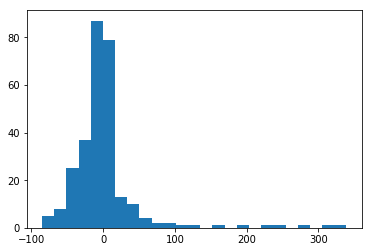

In [103]:
residual = y_test - predictions
plt.hist(residual, bins=25)
plt.show()

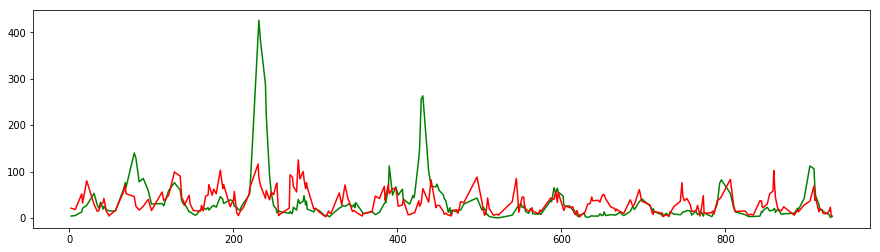

In [104]:
examine(predictions, y_test)